In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
df=pd.read_csv('flight_data.csv')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4169 entries, 0 to 4168
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4169 non-null   int64 
 1   Date            4169 non-null   object
 2   Airline         4169 non-null   object
 3   Departure Time  4169 non-null   object
 4   Arrival Time    4169 non-null   object
 5   Stops           4169 non-null   object
 6   Source          4169 non-null   object
 7   Destination     4169 non-null   object
 8   Duration        4169 non-null   object
 9   Price           4169 non-null   object
dtypes: int64(1), object(9)
memory usage: 325.8+ KB


In [215]:
df

,Unnamed: 0,Date,Airline,Departure Time,Arrival Time,Stops,Source,Destination,Duration,Price
0,0,"Sat, 29 Jan",Go First,21:00,23:15,Non Stop,New Delhi,Mumbai,2h 15m,"5,954"
1,1,"Sat, 29 Jan",Air India,18:00,20:00,Non Stop,New Delhi,Mumbai,2h 00m,"5,955"
2,2,"Sat, 29 Jan",IndiGo,17:15,19:25,Non Stop,New Delhi,Mumbai,2h 10m,"5,955"
3,3,"Sat, 29 Jan",IndiGo,18:40,20:50,Non Stop,New Delhi,Mumbai,2h 10m,"5,955"
4,4,"Sat, 29 Jan",SpiceJet,19:30,21:40,Non Stop,New Delhi,Mumbai,2h 10m,"5,955"
...,...,...,...,...,...,...,...,...,...,...
4164,127,"Wed,8 June",SpiceJet,18:00,09:35\n+ 1 day,1 Stop,Kolkata,Mumbai,15h 35m,"13,449"
4165,128,"Wed,8 June",SpiceJet,06:20,22:05,1 Stop,Kolkata,Mumbai,15h 45m,"14,183"
4166,129,"Wed,8 June",SpiceJet,06:20,21:05,1 Stop,Kolkata,Mumbai,14h 45m,"14,499"
4167,130,"Wed,8 June",SpiceJet,11:40,19:10,1 Stop,Kolkata,Mumbai,7h 30m,"15,779"


In [223]:
for i in df.columns:
    print(df[i].value_counts())

Sun,30 Jan     260
Mon,28 Feb     201
Sat,14 May     162
Wed, 23 Feb    154
Wed, 9 Mar     154
Mon,31 Jan     139
Mon,9 May      137
Thu,26 May     137
Sat,2 Apr      136
Sun,10 Apr     133
Wed,8 June     132
Thu,17 Mar     130
Mon,14 Mar     130
Sun,20 Feb     127
Tue,22 Mar     124
Wed,16 Feb     123
Wed,23 Mar     123
Mon,6 Jun      122
Sat, 12 Feb    121
Wed, 2 Feb     119
Sun,13 Feb     108
Fri,8 Apr      107
Tue,15 Feb     105
Fri,4 Feb      104
Tue, 1 Feb      94
Sun, 30 Jan     94
Sat,5 Feb       87
Thu,10 Mar      82
Mon, 31 Jan     82
Mon,25 Apr      77
Wed,6 Apr       73
Thu,3 Feb       72
Fri,17 Jun      70
Tue,1 Feb       52
Fri,11 Feb      52
Sat, 29 Jan     33
Sat,29 Jan      13
Name: Date, dtype: int64
Air India    1208
Vistara      1049
IndiGo        951
Go First      500
SpiceJet      242
Air Asia      219
Name: Airline, dtype: int64
10:15    107
12:55     91
10:25     85
07:10     78
07:00     69
        ... 
02:30      1
14:35      1
00:30      1
23:30      1
12:05 

In [221]:
df.columns

Index(['Date', 'Airline', 'Departure Time', 'Arrival Time', 'Stops', 'Source',
       'Destination', 'Duration', 'Price'],
      dtype='object')

<BarContainer object of 4169 artists>

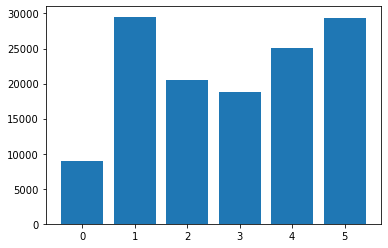

In [350]:
plt.bar(df['Airline'],df['Price'])

@Air Asia and Indigo flights seem to be generally cheaper as compared to Air India and Vistara.

In [351]:
df['Airline'].value_counts()

1    1208
5    1049
3     951
2     500
4     242
0     219
Name: Airline, dtype: int64

In [338]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
df['Airline'].value_counts()

Air India    1208
Vistara      1049
IndiGo        951
Go First      500
SpiceJet      242
Air Asia      219
Name: Airline, dtype: int64

In [4]:
df['Stops'].value_counts()

1 Stop       2741
Non Stop      669
2 Stop(s)     655
3 Stop(s)      95
4 Stop(s)       9
Name: Stops, dtype: int64

In [76]:
df['Stops'].value_counts()

1    2741
0     669
2     655
3      95
4       9
Name: Stops, dtype: int64

In [304]:
#encoding the Total_Stops column
df.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)": 3, "4 Stop(s)": 4}, inplace = True)

In [305]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [306]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]
Source = pd.get_dummies(Source)
Source.head()

,Source_Bangalore,Source_Chennai,Source_Hyderabad,Source_Kolkata,Source_New Delhi
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [307]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Ahmedabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [308]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
df= pd.concat([df, Airline, Source, Destination], axis = 1)

In [309]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Airline']= label_encoder.fit_transform(df['Airline'])

In [310]:
df['Source']= label_encoder.fit_transform(df['Source'])
df['Destination']= label_encoder.fit_transform(df['Destination'])

In [10]:
#df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [311]:
df['Airline'].value_counts()

1    1208
5    1049
3     951
2     500
4     242
0     219
Name: Airline, dtype: int64

In [312]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Departure_Time"] = pd.to_datetime(df["Departure Time"]).dt.hour

# Extracting Minutes
df["Departure_Min"] = pd.to_datetime(df["Departure Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Departure Time"], axis = 1, inplace = True)

In [313]:
df["Arrival Time"]=df["Arrival Time"].str.split('\n',expand=True)[0]

In [314]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df["Arrival Time"]).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df["Arrival Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival Time"], axis = 1, inplace = True)

In [346]:
df['Day']= label_encoder.fit_transform(df['Day'])

In [323]:
df['Day'].value_counts()

1    888
6    878
3    722
2    552
4    421
5    375
0    333
Name: Day, dtype: int64

In [347]:
df['Day'].value_counts()

1    888
6    878
3    722
2    552
4    421
5    375
0    333
Name: Day, dtype: int64

<BarContainer object of 4169 artists>

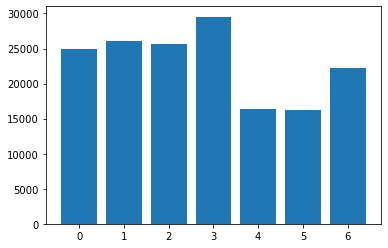

In [352]:
plt.bar(df['Day'],df['Price'])

Tuesday,Thursday,Wednesday has less flight price.
Friday,Saturday,Sunday,Monday has high flight prices as compared to other days.

In [318]:
# Time taken by plane to reach destination is called Duration
# It is the differnce between Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [319]:
# Adding duration_hours and duration_mins list to train_data dataframe
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [320]:
df.drop(["Duration"], axis = 1, inplace = True)

In [325]:
df['Day']=df['Date'].str.split(",",expand=True)[0]

In [326]:
# As Month is Nominal Categorical data we will perform OneHotEncoding

day = df[["Day"]]
day = pd.get_dummies(day)
day.head()

,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [327]:
df['Date']=df['Date'].str.split(",",expand=True)[1]

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4169 entries, 0 to 4168
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Date                   4169 non-null   int32
 1   Airline                4169 non-null   int32
 2   Stops                  4169 non-null   int64
 3   Source                 4169 non-null   int32
 4   Destination            4169 non-null   int32
 5   Price                  4169 non-null   int32
 6   Airline_Air Asia       4169 non-null   uint8
 7   Airline_Air India      4169 non-null   uint8
 8   Airline_Go First       4169 non-null   uint8
 9   Airline_IndiGo         4169 non-null   uint8
 10  Airline_SpiceJet       4169 non-null   uint8
 11  Airline_Vistara        4169 non-null   uint8
 12  Source_Bangalore       4169 non-null   uint8
 13  Source_Chennai         4169 non-null   uint8
 14  Source_Hyderabad       4169 non-null   uint8
 15  Source_Kolkata         4169 non-null  

In [329]:
df['Month']=df['Date'].str.replace("\d+ ",'')

In [330]:
df['Month']=df['Month'].str.replace(" Jan",'Jan')
df['Month']=df['Month'].str.replace(" Feb",'Feb')
df['Month']=df['Month'].str.replace("June",'Jun')
df['Month']=df['Month'].str.replace(" Mar",'Mar')

In [336]:
df['Month'].value_counts()

Feb    1519
Mar     743
Jan     621
Apr     526
May     436
Jun     324
Name: Month, dtype: int64

In [337]:
df.columns

Index(['Unnamed: 0', 'Date', 'Airline', 'Stops', 'Source', 'Destination',
       'Price', 'Airline_Air Asia', 'Airline_Air India', 'Airline_Go First',
       'Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Bangalore', 'Source_Chennai', 'Source_Hyderabad',
       'Source_Kolkata', 'Source_New Delhi', 'Destination_Ahmedabad',
       'Destination_Kolkata', 'Destination_Mumbai', 'Destination_New Delhi',
       'Departure_Time', 'Departure_Min', 'Arrival_hour', 'Arrival_min', 'Day',
       'Duration_hours', 'Duration_mins', 'Month'],
      dtype='object')

In [278]:
# As Month is Nominal Categorical data we will perform OneHotEncoding

mon = df[["Month"]]
mon = pd.get_dummies(mon)
mon.head()

,Month_Apr,Month_Feb,Month_Jan,Month_Jun,Month_Mar,Month_May
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [348]:
df['Month']= label_encoder.fit_transform(df['Month'])

In [341]:
df['Date']=df['Date'].str.extract(('(\d+)'))

In [174]:
pd.set_option('display.max_columns',None)

In [401]:
df['Month'].value_counts()

1    1519
4     743
2     621
0     526
5     436
3     324
Name: Month, dtype: int64

<BarContainer object of 4169 artists>

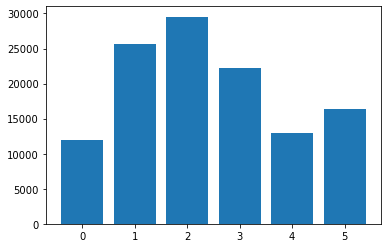

In [402]:
plt.bar(df['Month'],df['Price'])

Apr 0
Feb 1
Jan 2
Jun 3
Mar 4
May 5

--The data was collected in the month of january which shows a rise in the price for month January and february 
which infers that there is a rise in price when the departure date is nearby.
--The flight price is high if the departure date is nearby i.e.Jan and Feb(as the data collected in month of Jan) and seems to go down gradually in the month of Mar,Apr and grow afterwards in June,May. 

<BarContainer object of 4169 artists>

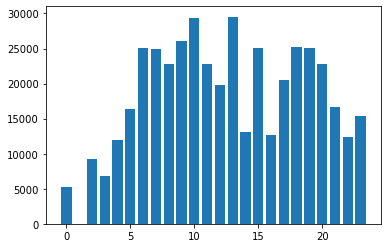

In [355]:
plt.bar(df['Departure_Time'],df['Price'])

The above plot shows that the early morning flights are cheaper.

In [345]:
df

,Date,Airline,Stops,Source,Destination,Price,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_Bangalore,Source_Chennai,Source_Hyderabad,Source_Kolkata,Source_New Delhi,Destination_Ahmedabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi,Departure_Time,Departure_Min,Arrival_hour,Arrival_min,Day,Duration_hours,Duration_mins,Month
0,29,2,0,4,2,5954,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,21,0,23,15,Sat,2,15,Jan
1,29,1,0,4,2,5955,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,18,0,20,0,Sat,2,0,Jan
2,29,3,0,4,2,5955,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,17,15,19,25,Sat,2,10,Jan
3,29,3,0,4,2,5955,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,18,40,20,50,Sat,2,10,Jan
4,29,4,0,4,2,5955,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,19,30,21,40,Sat,2,10,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,8,4,1,3,2,13449,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,18,0,9,35,Wed,15,35,Jun
4165,8,4,1,3,2,14183,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,6,20,22,5,Wed,15,45,Jun
4166,8,4,1,3,2,14499,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,6,20,21,5,Wed,14,45,Jun
4167,8,4,1,3,2,15779,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,11,40,19,10,Wed,7,30,Jun


In [343]:
df['Price']=df['Price'].str.replace(',','')
df['Price']=df['Price'].astype(int)
df['Date']=df['Date'].astype(int)

In [288]:
# we will perform OneHotEncoding

Day = df[["Day"]]
Day = pd.get_dummies(Day)

Month = df[["Month"]]
Month = pd.get_dummies(Month)

In [289]:
df= pd.concat([df, Month, Day], axis = 1)

In [374]:
df.drop(["Arrival_min", "Departure_Min","Duration_mins"], axis = 1, inplace = True)

In [376]:
df[df.columns].corr()['Price']

Date                     0.092325
Airline                  0.146491
Stops                    0.410924
Source                  -0.035465
Destination             -0.042044
Price                    1.000000
Airline_Air Asia        -0.134693
Airline_Air India        0.105114
Airline_Go First        -0.122598
Airline_IndiGo          -0.206033
Airline_SpiceJet         0.042406
Airline_Vistara          0.227525
Source_Bangalore         0.071181
Source_Chennai          -0.024843
Source_Hyderabad        -0.081218
Source_Kolkata           0.072658
Source_New Delhi        -0.044306
Destination_Ahmedabad   -0.024843
Destination_Kolkata      0.071181
Destination_Mumbai       0.027805
Destination_New Delhi   -0.081218
Departure_Time          -0.060831
Arrival_hour             0.106433
Day                     -0.185408
Duration_hours           0.311830
Month                   -0.054590
Name: Price, dtype: float64

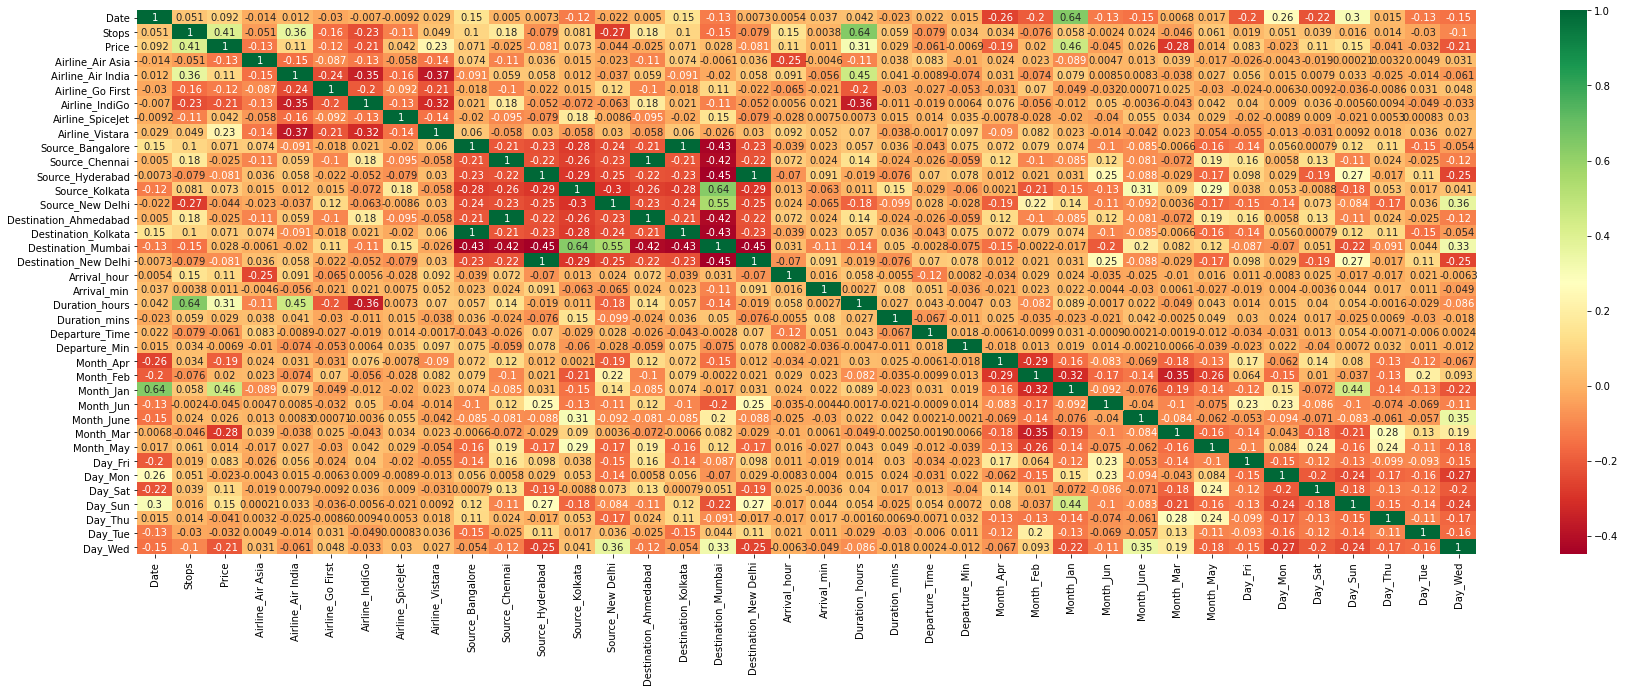

In [166]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr('pearson'), annot = True, cmap = "RdYlGn")

plt.show()

<AxesSubplot:>

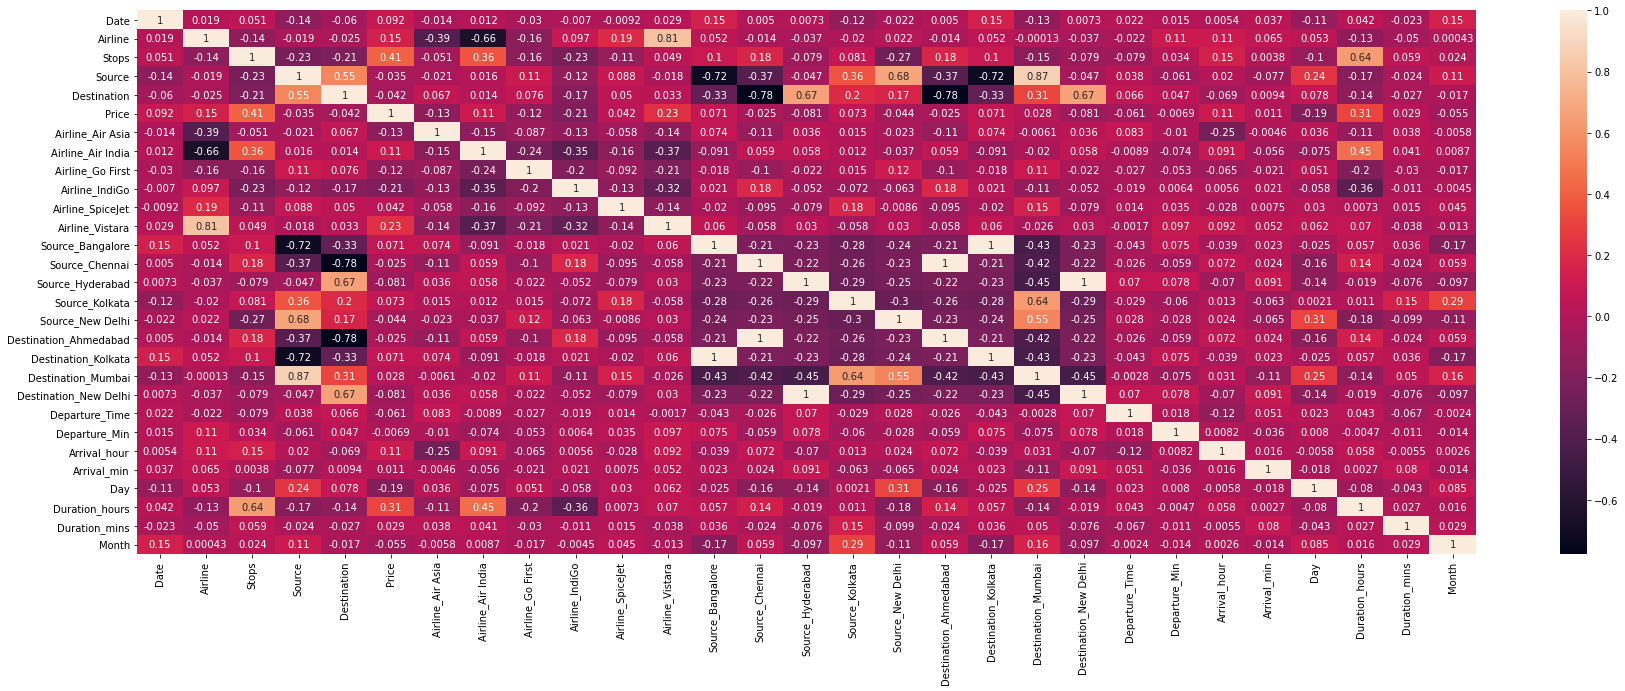

In [369]:
plt.figure(figsize = (30,10))
cor=df[df.columns].corr()
cor
sns.heatmap(cor,annot=True)

In [158]:
a=df[df.columns].corr()['Price']

<AxesSubplot:>

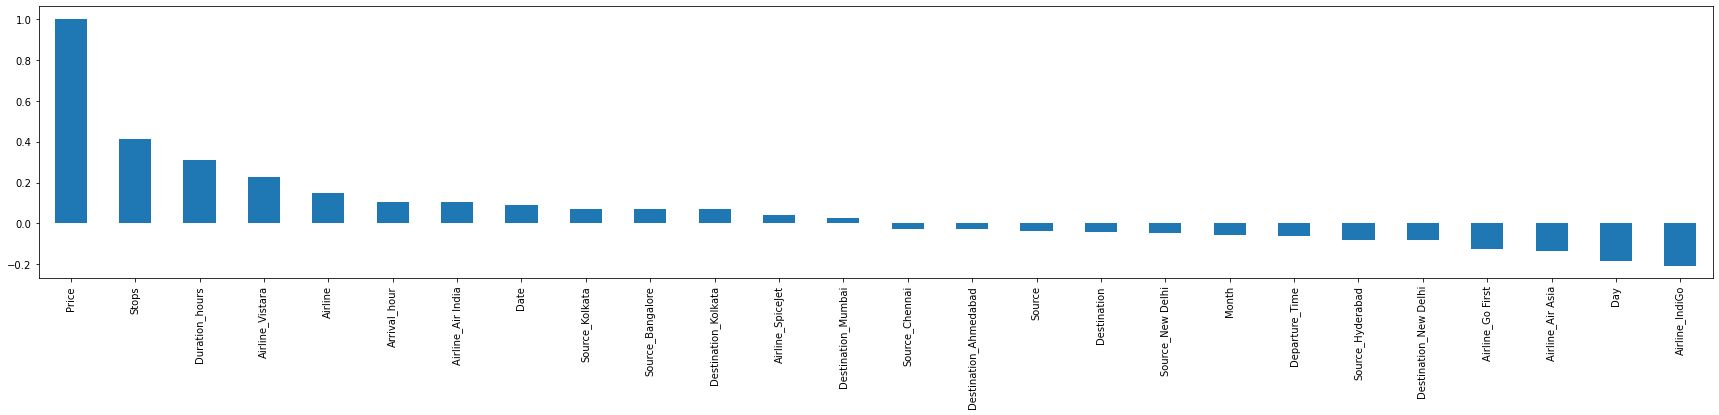

In [375]:
df.corr()['Price'].sort_values(ascending=False).plot(kind='bar',figsize=(30,5))

In [377]:
df

,Date,Airline,Stops,Source,Destination,Price,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_Bangalore,Source_Chennai,Source_Hyderabad,Source_Kolkata,Source_New Delhi,Destination_Ahmedabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi,Departure_Time,Arrival_hour,Day,Duration_hours,Month
0,29,2,0,4,2,5954,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,21,23,2,2,2
1,29,1,0,4,2,5955,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,18,20,2,2,2
2,29,3,0,4,2,5955,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,17,19,2,2,2
3,29,3,0,4,2,5955,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,18,20,2,2,2
4,29,4,0,4,2,5955,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,19,21,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,8,4,1,3,2,13449,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,18,9,6,15,3
4165,8,4,1,3,2,14183,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,6,22,6,15,3
4166,8,4,1,3,2,14499,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,6,21,6,14,3
4167,8,4,1,3,2,15779,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,11,19,6,7,3


<AxesSubplot:xlabel='Price', ylabel='Density'>

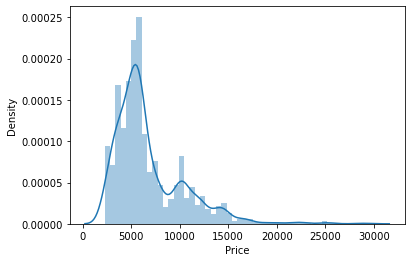

In [196]:
sns.distplot(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

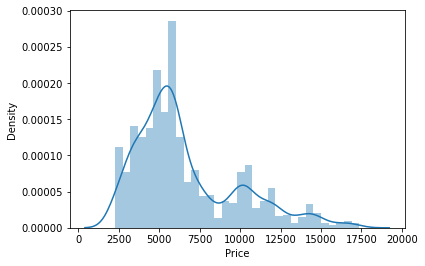

In [199]:
sns.distplot(df1["Price"])

In [200]:
df1.describe()

,Date,Airline,Stops,Source,Destination,Price,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_Bangalore,Source_Chennai,Source_Hyderabad,Source_Kolkata,Source_New Delhi,Destination_Ahmedabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi,Duration_hours,Duration_mins,Day,Month,Departure_Time,Departure_Min,Arrival_hour,Arrival_min
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.0,3618.000000,3618.000000,3618.000000,3618.0,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000
mean,15.694859,2.785793,1.044223,2.134605,1.662521,6627.963792,0.0,0.318961,0.137922,0.262300,0.0,0.280818,0.169707,0.184080,0.200387,0.233554,0.212272,0.184080,0.169707,0.445826,0.200387,11.230790,26.656993,3.100608,2.427861,12.943062,26.673577,15.972637,26.398563
std,9.613446,1.578557,0.636405,1.388512,0.996391,3190.311056,0.0,0.466138,0.344865,0.439945,0.0,0.449461,0.375427,0.387603,0.400345,0.423150,0.408973,0.387603,0.375427,0.497125,0.400345,7.850277,16.815456,2.014969,2.022385,5.222457,17.995649,5.801440,18.119907
min,1.000000,1.000000,0.000000,0.000000,0.000000,2276.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,1.000000,4477.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,15.000000,1.000000,1.000000,9.000000,10.000000,12.000000,10.000000
50%,14.000000,3.000000,1.000000,2.000000,2.000000,5790.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,25.000000,3.000000,2.000000,13.000000,30.000000,18.000000,25.000000
75%,25.000000,5.000000,1.000000,3.000000,2.000000,8160.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,40.000000,5.000000,5.000000,17.000000,45.000000,20.000000,40.000000
max,31.000000,5.000000,3.000000,4.000000,3.000000,17358.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,55.000000,6.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [198]:
df1['Price'].skew()

1.0799574607981473

<BarContainer object of 4169 artists>

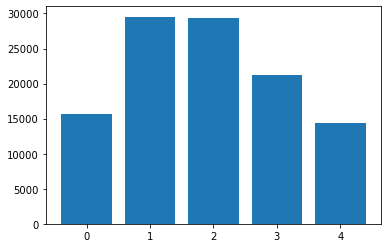

In [371]:
plt.bar(df['Stops'],df['Price'])

<BarContainer object of 3618 artists>

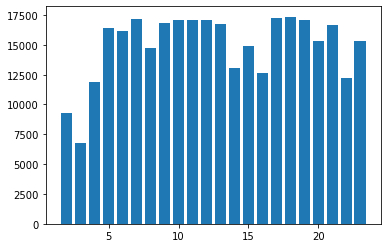

In [201]:
plt.bar(df1['Departure_Time'],df1['Price'])

In [378]:
df.skew()

Date                     0.183747
Airline                  0.146847
Stops                    0.629777
Source                  -0.190021
Destination             -0.422450
Price                    1.730172
Airline_Air Asia         4.012924
Airline_Air India        0.927226
Airline_Go First         2.340559
Airline_IndiGo           1.296357
Airline_SpiceJet         3.781426
Airline_Vistara          1.145174
Source_Bangalore         1.663114
Source_Chennai           1.775280
Source_Hyderabad         1.571305
Source_Kolkata           1.117525
Source_New Delhi         1.468664
Destination_Ahmedabad    1.775280
Destination_Kolkata      1.663114
Destination_Mumbai       0.159351
Destination_New Delhi    1.571305
Departure_Time           0.151183
Arrival_hour            -0.816201
Day                      0.137710
Duration_hours           0.978780
Month                    0.465924
dtype: float64

In [48]:
import numpy as np

In [189]:
df.shape

(4169, 29)

In [379]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("New shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())

New shape after removing outliers (3618, 26)
skewness after removing outliers
Date                     0.180563
Airline                  0.297088
Stops                    0.419992
Source                  -0.146094
Destination             -0.403338
Price                    1.079957
Airline_Air Asia         0.000000
Airline_Air India        0.777192
Airline_Go First         2.100987
Airline_IndiGo           1.081188
Airline_SpiceJet         0.000000
Airline_Vistara          0.975849
Source_Bangalore         1.760532
Source_Chennai           1.631027
Source_Hyderabad         1.497601
Source_Kolkata           1.260039
Source_New Delhi         1.407855
Destination_Ahmedabad    1.631027
Destination_Kolkata      1.760532
Destination_Mumbai       0.218068
Destination_New Delhi    1.497601
Departure_Time           0.191791
Arrival_hour            -0.849488
Day                      0.138023
Duration_hours           0.864872
Month                    0.482912
dtype: float64


In [380]:
X=df1.drop(["Price"],axis=1)
Y=df1['Price']

In [381]:
X.head()

,Date,Airline,Stops,Source,Destination,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Source_Bangalore,Source_Chennai,Source_Hyderabad,Source_Kolkata,Source_New Delhi,Destination_Ahmedabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi,Departure_Time,Arrival_hour,Day,Duration_hours,Month
0,29,2,0,4,2,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,21,23,2,2,2
1,29,1,0,4,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,18,20,2,2,2
2,29,3,0,4,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,17,19,2,2,2
3,29,3,0,4,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,18,20,2,2,2
5,29,1,0,4,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,20,22,2,2,2


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [383]:
model=[DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),LinearRegression()]
max_r2_score=0
for r_state in range(30,95):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=r_state,test_size=0.3)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        r2_sc=r2_score(y_test,pred)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print("max r2 score correspond to random state",final_state,"is",max_r2_score,"and model is",final_model)

max r2 score correspond to random state 88 is 0.8944453218395094 and model is RandomForestRegressor()


In [384]:
#splitting the data into 70% training and 30% testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=88)

In [387]:
from sklearn.model_selection import cross_val_score


def rmse_cv(model, x,y):
    rmse =cross_val_score(model,X,Y, cv=5)
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor()]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,X,Y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : -0.947390, 0.825490
RF    : 0.353811, 0.461564
DTR    : 0.088920, 0.558125
GBR    : 0.469224, 0.357570


In [72]:
import warnings
warnings.filterwarnings("ignore")

In [389]:
from sklearn.model_selection import GridSearchCV
parameter={'min_samples_leaf': [2,5,7,10],'min_samples_split': [2,5,7,10],
     'n_estimators':[100,200,300],
          'max_depth':[5,10,15,20,30]}
RCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5,scoring='accuracy',verbose=2,n_jobs=-1)
RCV.fit(x_train,y_train)

RCV.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [390]:
final_mod=RandomForestRegressor(min_samples_split=2,max_depth=5,min_samples_leaf= 2, n_estimators=100)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.7323237782498229


In [400]:
print("Mean r2 score for RandomForestRegressor:",cross_val_score(final_mod,X,Y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor",cross_val_score(final_mod,X,Y,cv=5,scoring="r2").std())

Mean r2 score for RandomForestRegressor: 0.3793500054202367
standard deviation in r2 score for RandomForestRegressor 0.4475227550449532


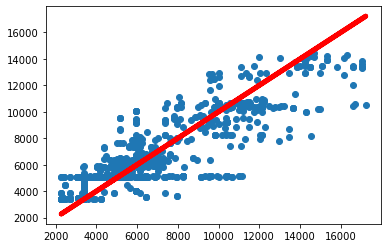

In [404]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,linewidth=5,color='Red')